# 使用pyecharts

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.faker import Faker
from pyecharts.charts import EffectScatter
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

D:\Anaconda3\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Anaconda3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
UMAP_3D = pd.read_excel('降维/UMAP腾讯词向量.xlsx',index_col=0)

In [3]:
UMAP_2D = pd.read_excel('降维/yuan_2d.xlsx',index_col=0)

In [4]:
name_list = UMAP_3D['人格词'].tolist()

## 2D

# 2D不同类别的效果

In [5]:
# c = Scatter(init_opts=opts.InitOpts(width="1600px", height="800px"))
# for i in range(16):
#     X = UMAP_2D[UMAP_2D['class'] == i][[0,1]].to_numpy()
#     c.add_xaxis(X[:,0])
#     c.add_yaxis(
#         "",
#         [list(z) for z in zip(X[:,1], data[data['class'] == i]['word'].tolist())],
#         label_opts=opts.LabelOpts(
#             formatter=JsCode(
#                "function(params){return params.value[2];}",
#             )))
# c.set_global_opts(
#     title_opts=opts.TitleOpts(title="【UMAP】16PF二维可视化效果"),
#     visualmap_opts=opts.VisualMapOpts(is_show=False),
#     datazoom_opts=opts.DataZoomOpts(type_="inside"),
# )
# c.render('【UMAP】16PF二维可视化效果.html')

## visdom 2D和3D

In [6]:
legend_list = []
for i in range(16):
    legend_list.append(str(i+1))

In [7]:
import visdom

viz = visdom.Visdom()

Setting up a new session...


## 三维

In [8]:
import random  # 导入随机数的包
# 定义一个函数
def ObtainRandom(n):
    list_info = []  # 定义一个空列表（用于接收产生的随机数）
    while True:
        info = random.randint(0,15667) # 每次循环获取一次随机数
        if info not in list_info:  # 判断随机数是否在列表中
            list_info.append(int(info))  # 不在列表中 进行添加
        if len(list_info) == n:  # 判断 长度是否达到100
            break  # 停止循环
    return list_info

In [9]:
n = 500
random_list = ObtainRandom(n)
name = []
for i in random_list:
    name.append(name_list[i]+'的')

In [11]:

viz.scatter(
    X=UMAP_3D.iloc[random_list][[0,1,2]].to_numpy(),
    Y=UMAP_3D.iloc[random_list]['聚类结果']+1,
    opts={
        'title': 'UMAP_3D Scatter',
        'legend': legend_list,
        'markersize': 3,
        'width': 800,
       'textlabels':name,#
        'height': 600
    }
              )

'window_39abed39d4a816'

In [31]:

viz.scatter(
    X=UMAP_3D[[0,1,2]].to_numpy(),
    Y=UMAP_3D['聚类结果']+1,
    opts={
        'title': 'UMAP_3D Scatter',
        'legend': legend_list,
        'markersize': 3,
        'width': 1366,
       # 'textlabels':name,#
        'height': 1024
    }
              )

'window_39abf24f7864a8'

In [13]:
viz.scatter(
    X=UMAP_2D[[0,1]].to_numpy(),
    Y=UMAP_2D['聚类结果']+1,
    opts={
        'title': 'PCA_3D Scatter',
        'legend': legend_list,
        'markersize': 3,
        'width': 800,
        #'textlabels':name_list[:300],
        'height': 600
    }
              )

'window_39abed39f92e3e'

In [14]:
# 密度图
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# 每个类别的读取
x = []
y= []
for i in range(6):
    x.append(UMAP_2D[UMAP_2D['聚类结果']==i][0].values.tolist())
    y.append(UMAP_2D[UMAP_2D['聚类结果']==i][1].values.tolist())


In [160]:
x[2].index(9.53833866119385)

153

In [149]:

for j in range(6):
    a = x[j]
    for k,v in enumerate(a):
        if v <5 or v > 14 :
            x[j].remove(v)
            y[j].pop(k)
            print(k,v)

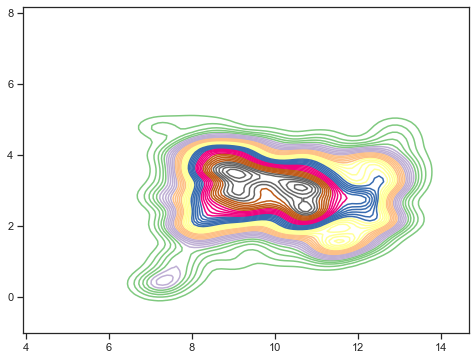

In [171]:
# 保存六张图，保存对比图
sns.set(rc={'figure.figsize':(8,6)})
i = 0
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第'+str(i+1)+'人格.png', dpi = 400)
# 保存六张图，保存对比图
sns.set(rc={'figure.figsize':(8,6)})

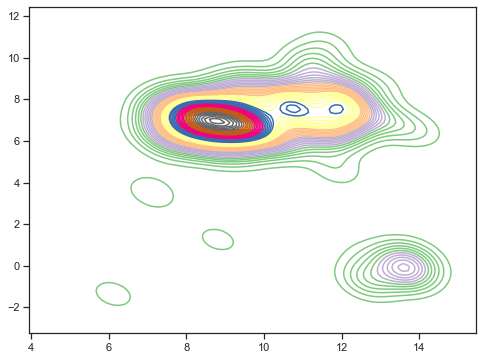

In [172]:
i = 1
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第'+str(i+1)+'人格.png', dpi = 400)

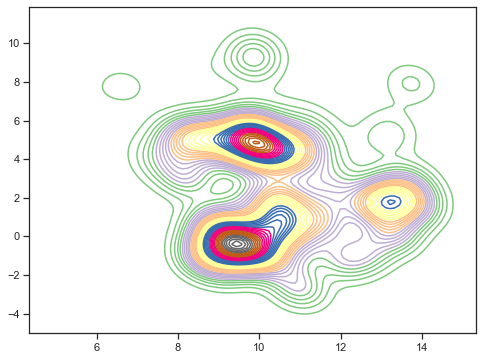

In [173]:
i = 2
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第'+str(i+1)+'人格.png', dpi = 400)

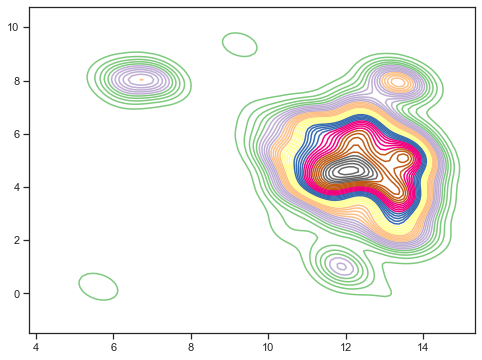

In [174]:
i = 3
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第'+str(i+1)+'人格.png', dpi = 400)

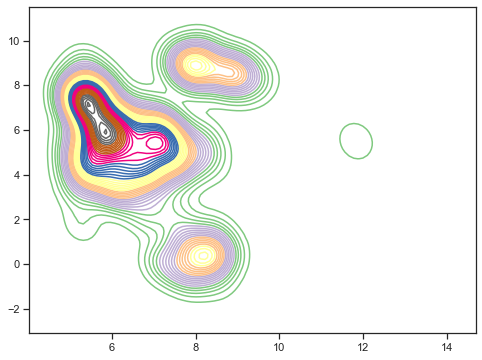

In [175]:
i = 4
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第'+str(i+1)+'人格.png', dpi = 400)

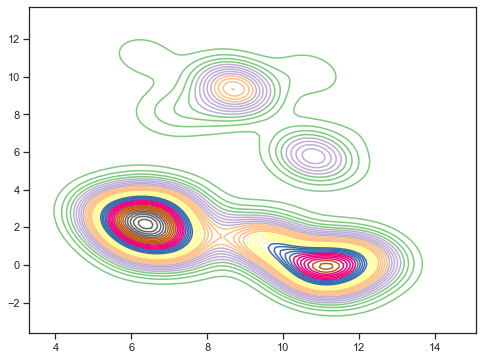

In [176]:
i = 5
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第'+str(i+1)+'人格.png', dpi = 400)

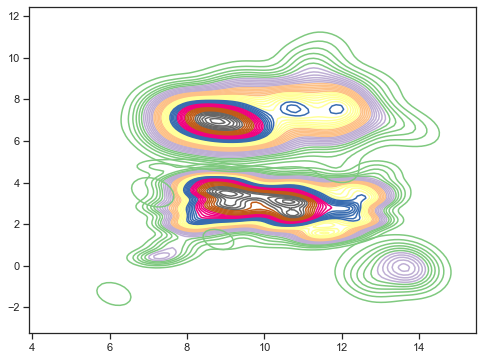

In [187]:
i = 0
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
i = 1
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第1和2人格.png', dpi = 400)

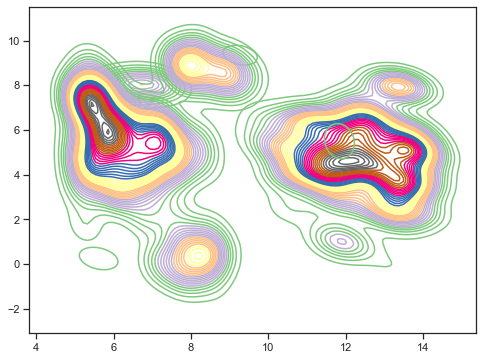

In [195]:
i = 3
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
i = 4
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第4和5人格.png', dpi = 400)

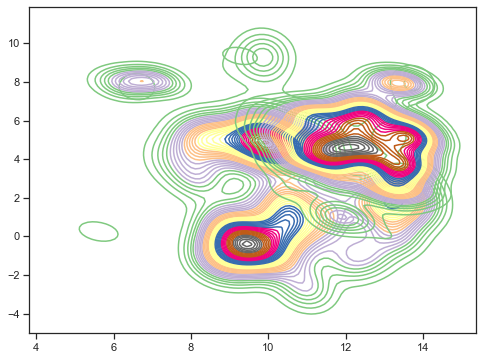

In [196]:
i = 2
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
i = 3
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
    boxplot = a.get_figure()
    boxplot.savefig('第3和4人格.png', dpi = 400)

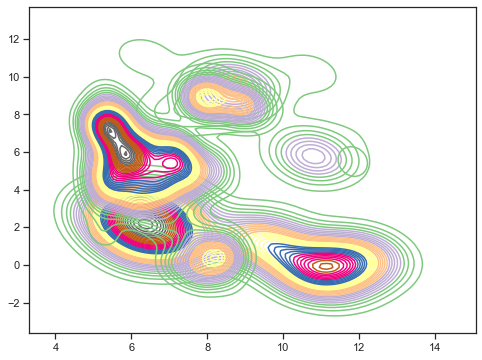

In [185]:
i = 5
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )
i = 4
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 50   # 曲线个数（如果非常多，则会越平滑）
       )

In [ ]:
i = 1
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 10   # 曲线个数（如果非常多，则会越平滑）
       )
i = 3
with sns.axes_style("ticks"):
    a = sns.kdeplot(x[i],y[i],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'Accent',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 10   # 曲线个数（如果非常多，则会越平滑）
       )

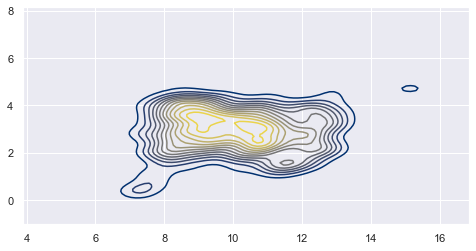

In [121]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('darkgrid')
sns.kdeplot(x[0],y[0],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'cividis',  # 设置调色盘,GnBu,cividis
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 15   # 曲线个数（如果非常多，则会越平滑）
       )

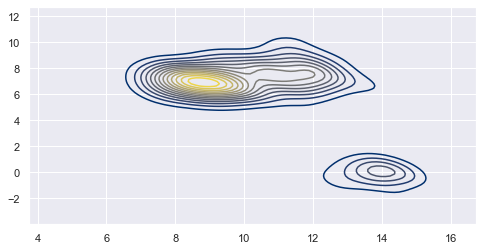

In [122]:
sns.kdeplot(x[1],y[1],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'cividis',  # 设置调色盘
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 15   # 曲线个数（如果非常多，则会越平滑）
       )

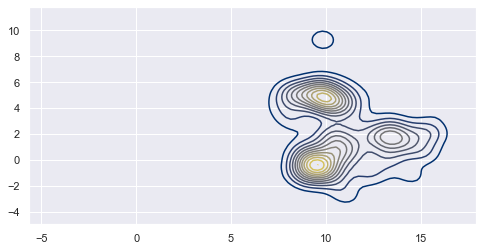

In [123]:
sns.kdeplot(x[2],y[2],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'cividis',  # 设置调色盘
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 15   # 曲线个数（如果非常多，则会越平滑）
       )

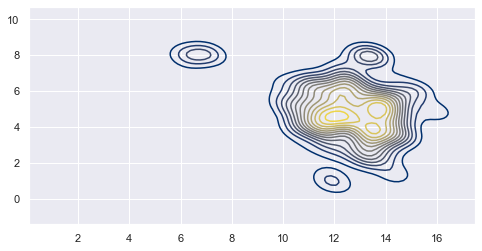

In [124]:
sns.kdeplot(x[3],y[3],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'cividis',  # 设置调色盘
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 15   # 曲线个数（如果非常多，则会越平滑）
       )

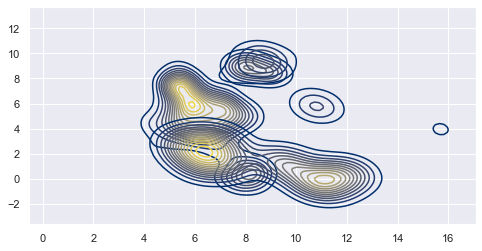

In [125]:
sns.kdeplot(x[4],y[4],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'cividis',  # 设置调色盘
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 15   # 曲线个数（如果非常多，则会越平滑）
       )
sns.kdeplot(x[5],y[5],
       cbar = False,    # 是否显示颜色图例
       shade = False,   # 是否填充
        cmap = 'cividis',  # 设置调色盘
       shade_lowest=False,  # 最外围颜色是否显示
       n_levels = 15   # 曲线个数（如果非常多，则会越平滑）
       )

# 折线图


In [126]:
weijiangwei_sc = [0.020163987,0.01878602,0.014091756,0.017048643,0.015000677,0.015528858,0.017441559,0.012403912,0.010706455,0.009708884,0.010283497,0.012099633,0.012275594,0.01326122,0.012607726,0.010580419,0.010196512,0.011594611,0.01145745,0.009805463,0.010033728,0.011513784,0.011992635,0.012810004,0.012915862,0.012444986,0.013035325,0.014327076,0.015404686,0.014952831,0.014144379,0.015387717,0.016291092,0.017319769,0.017135993]
PCA_sc = [0.21593597,0.222414873,0.212170135,0.214038197,0.197490683,0.202102926,0.192995922,0.174572823,0.166306934,0.156730315,0.1531538,0.148632001,0.154344699,0.153162468,0.153090088,0.153667496,0.149299155,0.15098882,0.152914437,0.150041802,0.154442491,0.147780027,0.147819661,0.147280099,0.150498242,0.148489888,0.144597599,0.147239965,0.150512322,0.151311545,0.150543328,0.152084321,0.151858515,0.152485141,0.15432719]
TSNE_sc = [0.211573718,0.203633068,0.191989622,0.199334388,0.210147126,0.205966478,0.212115035,0.209542728,0.209819746,0.200562141,0.192774406,0.187809124,0.185101379,0.184929711,0.178987678,0.178425687,0.181663751,0.182592976,0.184988273,0.186147685,0.186892336,0.191616396,0.195602262,0.195907097,0.196218519,0.196525443,0.199630507,0.202741684,0.206364383,0.205827719,0.20585497,0.210675808,0.214302608,0.213165487,0.218163646]
UMAP_sc = [0.273491235,0.266241003,0.246333199,0.242499957,0.257867898,0.257855584,0.267834773,0.263343031,0.277700189,0.266650421,0.267384213,0.271798901,0.269237868,0.272593824,0.278574631,0.278210448,0.278385014,0.279408618,0.284743243,0.288907158,0.291090637,0.284140255,0.290662361,0.289095909,0.294556593,0.295011191,0.297788567,0.298015991,0.300915217,0.306495532,0.30857409,0.3070081,0.308555614,0.312548467,0.315131964]


weijiangwei_ch = [174.2052133,156.367692,139.2177207,130.502748,123.6721236,116.0801439,109.7967117,103.6800219,98.46121192,93.74499976,89.34999462,85.67733206,82.33523604,79.41700929,76.77888705,74.41704017,72.27800267,70.28341047,68.42888142,66.74215649,65.12065464,63.65021668,62.31018175,61.05767923,59.91314712,58.8379262,57.80582432,56.84559238,55.89814756,54.99565988,54.14689199,53.32870939,52.56163631,51.84023493,51.14013919]
PCA_CH = [1884.512361,1984.633405,2093.559472,2107.452009,2050.161735,2041.785757,2030.920871,1927.886803,1850.508527,1785.254769,1735.21526,1702.452645,1680.887385,1645.076954,1610.582297,1582.308327,1558.892008,1541.76,1529.469612,1513.738781,1498.33608,1475.971296,1457.886637,1437.13133,1419.444969,1404.83366,1392.816613,1380.895586,1371.181757,1360.897475,1352.07669,1341.827634,1332.471174,1324.645663,1318.059556]
TSNE_CH = [1975.633213,1976.847616,1972.836054,2144.200861,2180.533342,2139.129262,2153.732813,2134.476435,2066.531307,2011.460832,1968.6081,1917.330259,1869.109003,1833.336276,1806.535713,1780.756945,1763.66427,1746.136552,1730.832286,1714.199823,1703.660648,1698.472823,1687.847079,1676.882294,1663.898638,1654.077799,1647.366728,1644.03495,1639.532172,1633.582957,1629.258179,1627.093313,1627.573033,1623.564809,1617.412789]
UMAP_CH = [2803.033155,2723.660779,2544.366422,2642.165294,2672.273969,2668.470145,2756.905129,2729.705004,2764.590454,2680.655786,2626.836751,2602.467064,2588.864843,2574.993278,2565.513374,2561.834108,2556.159891,2553.062261,2553.861299,2552.175337,2554.785472,2548.209594,2528.033556,2514.027276,2506.490728,2505.617684,2498.795092,2492.241474,2488.761938,2485.419207,2480.084986,2478.610598,2475.183648,2471.14513,2469.324411]

In [127]:
# SC
viz = visdom.Visdom()

N=20
x = list(range(2,N+2))
# Example for Latex Support
viz.line(
     X=x,  # x坐标
    Y=weijiangwei_sc[:N],  # y值
    win="line1",  # 窗口id
    name="No Dimension Reduction",  # 线条名称
    update=None,  # 已添加方式加入
    opts={
        'showlegend': True,  # 显示网格
        'title': "Comparison of Dimension Reduction to Clustering Results",
        'xlabel': "Number of Clusters",  # x轴标签
        'ylabel': "Silhouette Coefficient",  # y轴标签
    },
)

viz.line(
  X=x,
    Y=PCA_sc[:N],  # y值
    win="line1",  # 窗口id
    name="PCA",  # 线条名称
    update='append',  # 已添加方式加入
    
)
viz.line(
  X=x,
    Y=TSNE_sc[:N],  # y值
    win="line1",  # 窗口id
    name="TSNE",  # 线条名称
    update='append',  # 已添加方式加入
)
viz.line(
X=x,
    Y=UMAP_sc[:N],  # y值
    win="line1",  # 窗口id
    name="UMAP",  # 线条名称
    update='append',  # 已添加方式加入
)

NameError: name 'visdom' is not defined

In [ ]:
x = list(range(2,N+2))
# Example for Latex Support
viz.line(
     X=x,  # x坐标
    Y=weijiangwei_ch[:N],  # y值
    win="line2",  # 窗口id
    name="No Dimension Reduction",  # 线条名称
    update=None,  # 已添加方式加入
    opts={
        'showlegend': True,  # 显示网格
        'title': "Comparison of Dimension Reduction to Clustering Results",
        'xlabel': "Number of Clusters",  # x轴标签
        'ylabel': "Calinski Harabaz Score",  # y轴标签
    },
)

viz.line(
  X=x,
    Y=PCA_CH[:N],  # y值
    win="line2",  # 窗口id
    name="PCA",  # 线条名称
    update='append',  # 已添加方式加入
    
)
viz.line(
  X=x,
    Y=TSNE_CH[:N],  # y值
    win="line2",  # 窗口id
    name="TSNE",  # 线条名称
    update='append',  # 已添加方式加入
)
viz.line(
X=x,
    Y=UMAP_CH[:N],  # y值
    win="line2",  # 窗口id
    name="UMAP",  # 线条名称
    update='append',  # 已添加方式加入
)

In [ ]:
gmm_sc = [0.282040447,0.28619656,0.261180937,0.240586445,0.26625514,0.254903585,0.232190013,0.183494836,0.219622105,0.248912275,0.224445105,0.214984909,0.207043335,0.198488787,0.203249753,0.216815636,0.173315942,0.170482934,0.180001289,0.241088673,0.234337896,0.251137376,0.225325063,0.205682099,0.224187747,0.216792479,0.20971866,0.207761943,0.227645427,0.236079752,0.220572516,0.230288088,0.22225517,0.22137773,0.243924737,0.233222291,0.200134322,0.235531539,0.229645491,0.219469756,0.229898304,0.226781458,0.218302757,0.229751751,0.243118986,0.23467584,0.237385303,0.236084566,0.243675545]
gmm_ch = [5906.272503,6153.46642,5041.776137,4543.322063,5307.422488,5153.827558,4741.180381,3781.345122,4607.940949,4802.417067,4437.346554,4226.026693,4193.42593,3789.680598,3726.903965,4114.485916,3205.774944,3013.138034,3292.917522,4290.309443,4004.656031,4131.248479,3824.934214,3514.740646,3633.087724,3662.801041,3590.243218,3536.021244,3794.87395,3977.450245,3521.822244,3728.303655,3521.273911,3529.63725,3887.947455,3652.972013,3051.452837,3644.075065,3579.135582,3336.12518,3388.85008,3391.113401,3204.650034,3334.602191,3606.11974,3468.41886,3534.263527,3467.786892,3494.994249]

cengci_sc = [0.197228447,0.211367831,0.208986118,0.219782069,0.234554946,0.250701755,0.255932063,0.259605676,0.242420703,0.240721315,0.260147631,0.270050824,0.275618821,0.265158027,0.260783315,0.255896151,0.248236045,0.244709149,0.246320888,0.25001207,0.251722932,0.248793632,0.245195642,0.24701044,0.248755932,0.253114522,0.255545259,0.258317292,0.256922454,0.257233888,0.258019209,0.260226429,0.264275163,0.266587108,0.2667588,0.270076752,0.272133589,0.273988098,0.276759058,0.276073694,0.274056733,0.274747401,0.272875786,0.275309861,0.27797693,0.276253849,0.276994348,0.279289216,0.281286627]
cengci_ch = [3892.505314,4509.183676,4701.985809,4838.556535,5039.602795,5222.600854,5171.804978,5147.226914,5067.658608,5072.772627,5103.908857,5207.371978,5193.036273,5111.21612,5014.338325,4932.99729,4873.626062,4836.496712,4796.806964,4774.493982,4759.21979,4716.551858,4678.539481,4644.126574,4620.94077,4607.166238,4597.595073,4581.028167,4568.315605,4559.894674,4553.468967,4553.662123,4538.639045,4524.542266,4512.404327,4504.305457,4500.993052,4498.392368,4486.088946,4471.963381,4461.048862,4454.215729,4449.844127,4449.326148,4440.87272,4427.261,4415.534191,4405.884486,4398.243659]

In [ ]:
viz = visdom.Visdom()

x = list(range(2,51))
N = 49

viz.line(
     X=x,  # x坐标
    Y=gmm_sc[:N],  # y值
    win="line3",  # 窗口id
    name="GMM clustering",  # 线条名称
    update=None,  # 已添加方式加入
    opts={
        'showlegend': True,  # 显示网格
        'title': "Comparison of Dimension Reduction to Clustering Results",
        'xlabel': "Number of Clusters",  # x轴标签
        'ylabel': "Silhouette Coefficient",  # y轴标签
    },
)

viz.line(
  X=x,
    Y=cengci_sc,  # y值
    win="line3",  # 窗口id
    name="hierarchical clustering",  # 线条名称
    update='append',  # 已添加方式加入
    
)

In [ ]:
viz.line(
     X=x,  # x坐标
    Y=gmm_ch[:N],  # y值
    win="line4",  # 窗口id
    name="GMM clustering",  # 线条名称
    update=None,  # 已添加方式加入
    opts={
        'showlegend': True,  # 显示网格
        'title': "Comparison of Dimension Reduction to Clustering Results",
        'xlabel': "Number of Clusters",  # x轴标签
        'ylabel': "Calinski Harabaz Score",  # y轴标签
    },
)

viz.line(
  X=x,
    Y=cengci_ch,  # y值
    win="line4",  # 窗口id
    name="hierarchical clustering",  # 线条名称
    update='append',  # 已添加方式加入
    
)

In [ ]:
# x1 = UMAP_2D[UMAP_2D['聚类结果']==0][0].values.tolist()
# y1 = UMAP_2D[UMAP_2D['聚类结果']==0][1].values.tolist()
# xy1 = np.vstack([x,y])
# z1 = gaussian_kde(xy)(xy)
# x2 = UMAP_2D[UMAP_2D['聚类结果']==1][0].values.tolist()
# y2 = UMAP_2D[UMAP_2D['聚类结果']==1][1].values.tolist()

# xy2 = np.vstack([x2,y2])
# z2 = gaussian_kde(xy2)(xy2)


# fig, ax = plt.subplots()

# plt.scatter(x1, y1,c=z1,  s=10,cmap='Spectral_r')
# plt.scatter(x2, y2,c=z2,  s=10,cmap='Spectral_r')

# plt.colorbar()
# plt.show()

In [ ]:


# sns.kdeplot(x1,y1,
#            cbar = True,    # 是否显示颜色图例
#            shade = False,   # 是否填充
# #            cmap = 'Reds',  # 设置调色盘
#            shade_lowest=False,  # 最外围颜色是否显示
#            n_levels = 10   # 曲线个数（如果非常多，则会越平滑）
#            )
# # 两个维度数据生成曲线密度图，以颜色作为密度衰减显示

# sns.kdeplot(x2,y2, cbar = True,    # 是否显示颜色图例
#             shade = True,shade_lowest=False)

# sns.rugplot(x1, color="g", axis='x',alpha = 0.5)
# sns.rugplot(y1, color="r", axis='y',alpha = 0.5)
